In [85]:
import matplotlib.pyplot as plt
import math

In [86]:
x_init = 0
y_init = 0
x0 = x_init

vx = 1
vy = 10
g = 9.81
coef = 0.7

dt = 0.01
t_limit = 20
t = 0
bt = 0

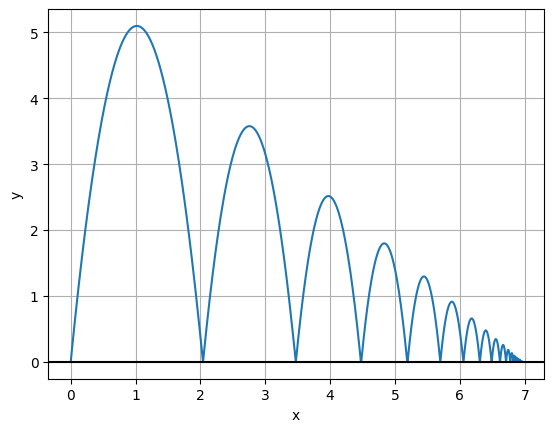

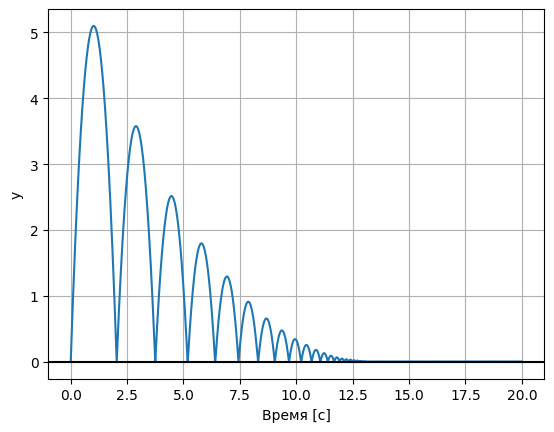

In [87]:
x_list = []
y_list = []

while t < t_limit:
    x = x0 + vx * bt
    y = vy * bt - g * bt**2 / 2

    if y < 0:
        x0 = x
        y = 0
        vx *= math.sqrt(coef)
        vy = -math.sqrt(coef) * (vy - g * bt)
        bt = 0

    t += dt
    bt += dt

    x_list.append(x)
    y_list.append(y)

t_list = [e * dt for e in range(int(t_limit / dt))]

plt.plot(x_list, y_list)
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(t_list, y_list)
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.grid()
plt.xlabel('Время [с]')
plt.ylabel('y')
plt.show()